Group : __3__ <br>
Anggota Kelompok (NIM) : <br>
- __Felicya Irenea Darmawi (23101910064)__
- __David Hansel Gunawan (23101910071)__
- __Jonathan C (23101910043)__<br>

Prodi Angkatan : __BM2019__ <br>
Mata Kuliah : __Regression Analysis and Forecasting Techniques__ <br>
Hal: __UAS__ <br>
Data : __Monthly Average Temperature in Auckland 2005 - 2019__ <br>

# Analisis Time Series and Forecasting Technique Terhadap Monthly Average Temperature in Auckland, 2005 - 2019

## <font color='blue'>Import Libraries & Classes</font>

In [203]:
# To tidy up data
import pandas as pd
import numpy as np
from datetime import datetime

# To create visualization
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

# To set theme
sns.set()

# To model the data
import scipy.stats
import pylab
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from sklearn.metrics import r2_score

## <font color='blue'>Import Data</font>

In [2]:
DF = pd.read_csv(r'daily-temperature-1909-2019.csv',parse_dates=['date']) #The date column is converted into datetime data type
DF #DF is the raw data

,location_name,date,statistic,temperature,station_name_niwa,agent_number
0,Auckland,1966-01-01,Maximum,22.2,Auckland Aero,1962
1,Auckland,1966-01-01,Minimum,13.9,Auckland Aero,1962
2,Auckland,1966-01-01,Average,18.1,Auckland Aero,1962
3,Auckland,1966-01-02,Maximum,23.9,Auckland Aero,1962
4,Auckland,1966-01-02,Minimum,17.1,Auckland Aero,1962
...,...,...,...,...,...,...
2049466,Whangarei,2019-12-30,Minimum,12.7,Whangarei Aero Aws,1287
2049467,Whangarei,2019-12-30,Average,18.9,Whangarei Aero Aws,1287
2049468,Whangarei,2019-12-31,Maximum,24.1,Whangarei Aero Aws,1287
2049469,Whangarei,2019-12-31,Minimum,16.5,Whangarei Aero Aws,1287


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049471 entries, 0 to 2049470
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   location_name      object        
 1   date               datetime64[ns]
 2   statistic          object        
 3   temperature        float64       
 4   station_name_niwa  object        
 5   agent_number       int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 93.8+ MB


## <font color='blue'>Create Time Series Data</font>

In [4]:
df = DF[(DF['location_name']=='Auckland') & (DF['statistic']=="Average") & (DF['date']>=datetime(2005,1,1))].copy() #select average temperature daily data in Auckland, 2005 - 2019
ts = df.loc[:, ["date","temperature"]]
ts.index = ts.date #assign date as index to make time series data
ts = ts.resample('1M').mean() #transform daily data to monthly data
ts

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2019-08-31,12.093548
2019-09-30,13.323333
2019-10-31,14.609677


## <font color='blue'>Data Preprocessing</font>

### Check Null and Duplicated Entries

In [5]:
ts.isnull().sum()

temperature    0
dtype: int64

In [6]:
ts.duplicated().sum()

0

======================================================================================================================= <br>
There is no null and duplicated entry.
======================================================================================================================= <br>

### Check and Fix Data Type for Each Column

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2005-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


======================================================================================================================= <br>
The data type is appropriate.
======================================================================================================================= <br>

### Plotting The Data

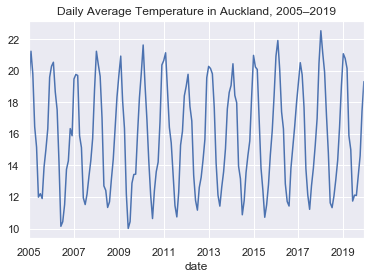

In [8]:
ts['temperature'].plot()
plt.title('Daily Average Temperature in Auckland, 2005–2019')
plt.show()

======================================================================================================================= <br>
In our hypothesis, an overview of the graph shows that: 
1. There is no trend in the data
2. Seasonality exist since the highest temperature happened on june - july and the lowest temperature happened on dec - jan
3. No cyclic behaviour present in the data
======================================================================================================================= <br>

### Train Test Split

In [9]:
size = int(len(ts)*0.8) #take 80% of the initial data as train data and 20% as test data
ts_train, ts_test = ts.iloc[:size], ts.iloc[size:]
ts_train

,temperature
date,
2005-01-31,19.306452
2005-02-28,21.239286
2005-03-31,19.796774
2005-04-30,16.450000
2005-05-31,15.161290
...,...
2016-08-31,11.425806
2016-09-30,13.823333
2016-10-31,15.132258


In [169]:
ts_test

,temperature
date,
2017-01-31,19.261290
2017-02-28,20.510714
2017-03-31,19.745161
2017-04-30,17.673333
2017-05-31,13.793548
2017-06-30,12.133333
2017-07-31,11.216129
2017-08-31,12.716129
2017-09-30,13.823333


### Check Stationarity of The Train Dataset

$H_0$ = Data is not stationary

$H_1$ = Data is stationary

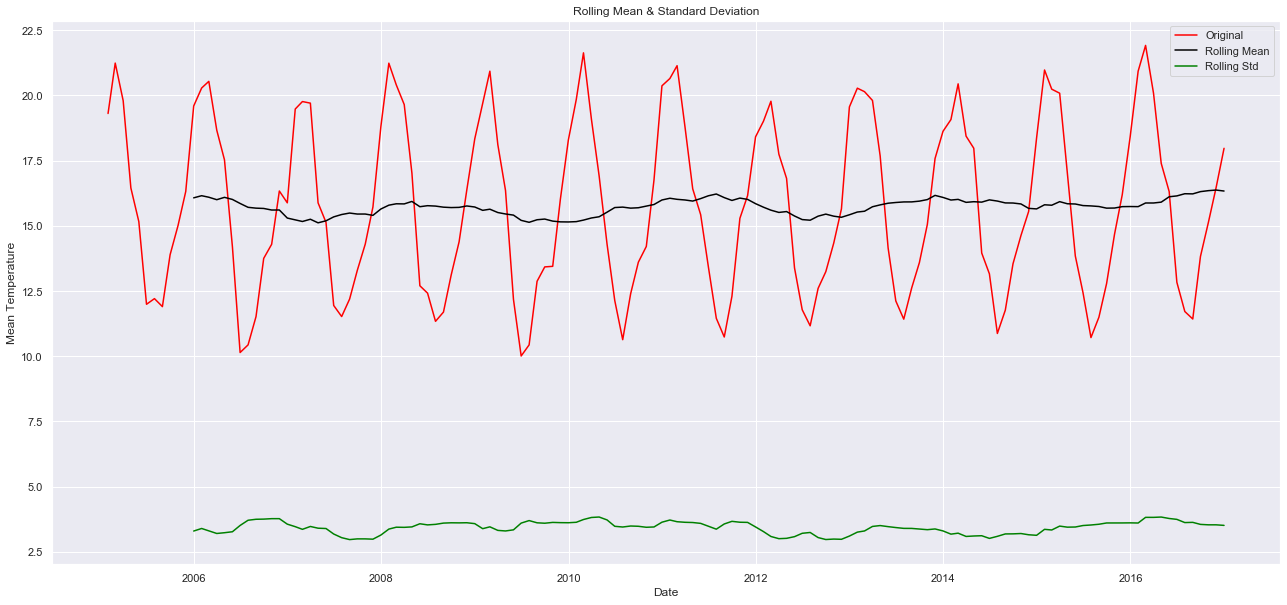

Test statistic:  -2.768903533019698
p-value:  0.0628547998004625
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


In [142]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = sts.adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts,n):
    #Rolling statistics
    rolmean = ts.rolling(n).mean()
    rolstd = ts.rolling(n).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_train,12)
check_adfuller(ts_train.temperature)


======================================================================================================================= <br>
Since p-value (0.0629) > 5%, then we do not reject $H_0$ <br>
Thus, the data is non-stationary.

And above graph shows when the data is smoothed using MA(12). Here we can see that the average mean and std is not constant yet.<br>
Thus, the graph also shows that the data is non-stationary.
======================================================================================================================= <br>

## Check Seasonality of The Data

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


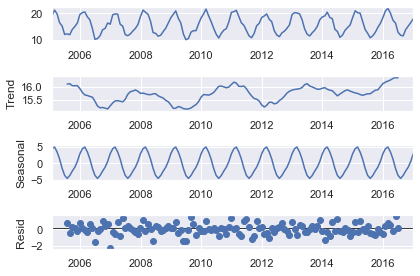

In [11]:
seasonal_decompose(ts_train, model='additive',freq=12).plot()
plt.show()

======================================================================================================================= <br>
There is seasonality but no constant trend exist.
======================================================================================================================= <br>

## <font color='blue'>Modelling The Time Series Train Dataset</font>

### The ACF

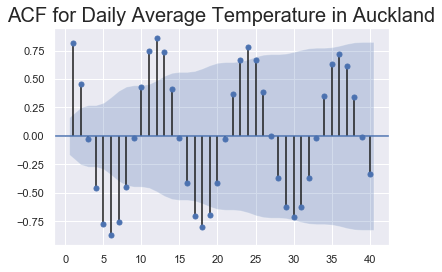

In [12]:
sgt.plot_acf(ts_train.temperature, zero = False, lags = 40)

# Plot title
plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

# Show plot
plt.show()

### The PACF

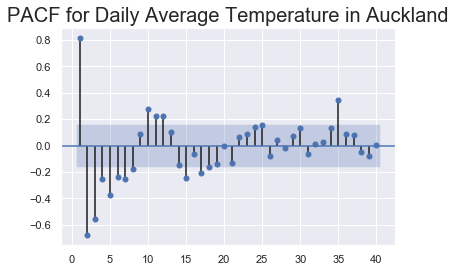

In [41]:
sgt.plot_pacf(ts_train.temperature[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
# Plot title
plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

# Show plot
plt.show()

======================================================================================================================= <br>
1. The ACF trailed off to zero rather quickly and shows pattern. It means that the data shows no trend, but seasonality exist as ACF at lags 6, 12, 18, and 24 are significant but slowly decreasing.
2. The PACF spike at lag 1, 2, and 3 and the rest is not significant.

In conclusion, Since the ACF shows no trend and additive seasonal variability exist, we will try to use seasonal differencing (d = 0 and D = 1).</font>
======================================================================================================================= <br>

### Seasonal Differencing

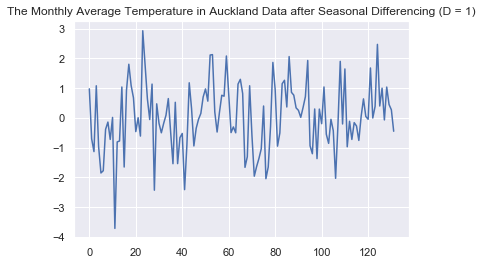

In [42]:
resample = ts_train.resample("M")
monthly_mean = resample.mean()
ts_train_sdiff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    ts_train_sdiff.append(value)
pyplot.title("The Monthly Average Temperature in Auckland Data after Seasonal Differencing (D = 1)")
pyplot.plot(ts_train_sdiff)
pyplot.show()

In [115]:
pd.DataFrame(ts_train_sdiff).dropna(inplace=True) # due to shifting there is nan values
# check stationary:adfuller test
check_adfuller(ts_train_diff.temperature)

Test statistic:  -4.326889330575984
p-value:  0.0003989218320373751
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


======================================================================================================================= <br>
Since p-value (0.0004) < 5%, then we reject $H_0$ <br>
Thus, the data is stationary.
======================================================================================================================= <br>

### ACF and PACF for D = 1

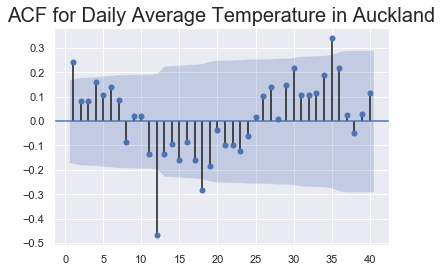

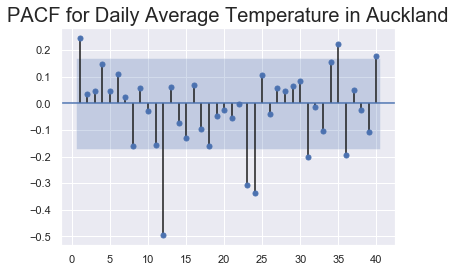

In [61]:
sgt.plot_acf(ts_train_sdiff, zero = False, lags = 40)
plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

sgt.plot_pacf(ts_train_sdiff[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

plt.show()

======================================================================================================================= <br>
1. The ACF shows a spike at lag 1, 12, 18, and 35 but no other significant spikes. It indicating MA(1) and SMA(1)
2. The PACF shows a spike at lag 1, 12, 23, 24, 31, 35, and 36 but no other significant spikes. It indicating AR(1) and SAR (2) / SAR(3) 

Therefore, we will try:<br>
SARIMA(1,0,0)(2,1,0)$_{12}$<br>
SARIMA(1,0,0)(3,1,0)$_{12}$<br>
SARIMA(0,0,1)(0,1,1)$_{12}$<br>
SARIMA(1,0,1)(2,1,1)$_{12}$<br>
SARIMA(1,0,1)(3,1,1)$_{12}$
======================================================================================================================= <br>

### The SARIMA Model

#### SARIMA(1,0,0)(2,1,0)$_{12}$

In [146]:
model_sarima1 = SARIMAX(ts_train.temperature, order=(1,0,0), seasonal_order = (2,1,0,12))
results_sarima1 = model_sarima1.fit()
results_sarima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -169.373
Date:                            Sun, 04 Jul 2021   AIC                            346.745
Time:                                    21:39:40   BIC                            358.276
Sample:                                01-31-2005   HQIC                           351.431
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1442      0.094      1.532      0.125      -0.040       0.329
ar.S.L12      -0.7458      0.076     -9.842      0.000      -0.894      -0.597
ar.S.L24      -0.4271      0.092     -4.618      0.000      -0.608      -0.246
sigma2         0.7136      0.075      9.481      0.000       0.566       0.861
===================================================================================
Ljung-Box (Q):                       43.87   Jarque-Bera (JB):                 4.08
Prob(Q):                              0.31   Prob(JB):                         0.13
Heteroskedasticity (H):               0.68   Skew:                             0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA(1,0,0)(3,1,0)$_{12}$

In [147]:
model_sarima2 = SARIMAX(ts_train.temperature, order=(1,0,0), seasonal_order = (3,1,0,12))
results_sarima2 = model_sarima1.fit()
results_sarima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -169.373
Date:                            Sun, 04 Jul 2021   AIC                            346.745
Time:                                    21:39:42   BIC                            358.276
Sample:                                01-31-2005   HQIC                           351.431
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1442      0.094      1.532      0.125      -0.040       0.329
ar.S.L12      -0.7458      0.076     -9.842      0.000      -0.894      -0.597
ar.S.L24      -0.4271      0.092     -4.618      0.000      -0.608      -0.246
sigma2         0.7136      0.075      9.481      0.000       0.566       0.861
===================================================================================
Ljung-Box (Q):                       43.87   Jarque-Bera (JB):                 4.08
Prob(Q):                              0.31   Prob(JB):                         0.13
Heteroskedasticity (H):               0.68   Skew:                             0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA(0,0,1)(0,1,1)$_{12}$

In [155]:
model_sarima3 = SARIMAX(ts_train.temperature, order=(0,0,1), seasonal_order = (0,1,1,12))
results_sarima3 = model_sarima3.fit()
results_sarima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -166.005
Date:                            Sun, 04 Jul 2021   AIC                            338.011
Time:                                    21:44:56   BIC                            346.659
Sample:                                01-31-2005   HQIC                           341.525
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1760      0.094      1.876      0.061      -0.008       0.360
ma.S.L12      -0.9980      9.639     -0.104      0.918     -19.890      17.894
sigma2         0.5787      5.558      0.104      0.917     -10.315      11.472
===================================================================================
Ljung-Box (Q):                       56.09   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.05   Prob(JB):                         0.23
Heteroskedasticity (H):               0.65   Skew:                            -0.13
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA(1,0,1)(2,1,1)$_{12}$

In [149]:
model_sarima4 = SARIMAX(ts_train.temperature, order=(1,0,1), seasonal_order = (2,1,1,12))
results_sarima4 = model_sarima4.fit()
results_sarima4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -164.733
Date:                            Sun, 04 Jul 2021   AIC                            341.466
Time:                                    21:40:02   BIC                            358.762
Sample:                                01-31-2005   HQIC                           348.494
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7458      0.225      3.315      0.001       0.305       1.187
ma.L1         -0.5910      0.272     -2.169      0.030      -1.125      -0.057
ar.S.L12      -0.0593      0.151     -0.393      0.694      -0.355       0.236
ar.S.L24      -0.0299      0.138     -0.217      0.828      -0.300       0.240
ma.S.L12      -0.9964      7.819     -0.127      0.899     -16.322      14.329
sigma2         0.5605      4.332      0.129      0.897      -7.929       9.050
===================================================================================
Ljung-Box (Q):                       50.70   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.12   Prob(JB):                         0.33
Heteroskedasticity (H):               0.66   Skew:                            -0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA(1,0,1)(3,1,1)$_{12}$

In [150]:
model_sarima5 = SARIMAX(ts_train.temperature, order=(1,0,1), seasonal_order = (3,1,1,12))
results_sarima5 = model_sarima5.fit()
results_sarima5.summary()

C:\Users\felic\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(3, 1, 1, 12)   Log Likelihood                -168.127
Date:                            Sun, 04 Jul 2021   AIC                            350.254
Time:                                    21:40:17   BIC                            370.433
Sample:                                01-31-2005   HQIC                           358.454
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2785      0.778      0.358      0.720      -1.246       1.803
ma.L1         -0.1701      0.794     -0.214      0.830      -1.727       1.387
ar.S.L12      -1.6356      0.340     -4.813      0.000      -2.302      -0.970
ar.S.L24      -1.0777      0.318     -3.392      0.001      -1.700      -0.455
ar.S.L36      -0.3247      0.219     -1.486      0.137      -0.753       0.104
ma.S.L12       0.9980     11.563      0.086      0.931     -21.666      23.662
sigma2         0.6507      7.343      0.089      0.929     -13.742      15.043
===================================================================================
Ljung-Box (Q):                       44.12   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.30   Prob(JB):                         0.12
Heteroskedasticity (H):               0.69   Skew:                             0.10
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
#create a comparison dataframe among the SARIMA model
p = ['Log Likelihood', 'AIC', 'BIC']
m1 = [results_sarima1.llf, results_sarima1.aic, results_sarima1.bic]
m2 = [results_sarima2.llf, results_sarima2.aic, results_sarima2.bic]
m3 = [results_sarima3.llf, results_sarima3.aic, results_sarima3.bic]
m4 = [results_sarima4.llf, results_sarima4.aic, results_sarima4.bic]
m5 = [results_sarima5.llf, results_sarima5.aic, results_sarima5.bic]

columns = {' ': p, 
           'SARIMA(1,0,0)(2,1,0)$_{12}$': m1, 
           'SARIMA(1,0,0)(3,1,0)$_{12}$': m2,
           'SARIMA(0,0,1)(0,1,1)$_{12}$': m3,
           'SARIMA(1,0,1)(2,1,1)$_{12}$': m4,
           'SARIMA(1,0,1)(3,1,1)$_{12}$': m5}
compare = pd.DataFrame(columns).set_index(' ')
compare

,"SARIMA(1,0,0)(2,1,0)$_{12}$","SARIMA(1,0,0)(3,1,0)$_{12}$","SARIMA(0,0,1)(0,1,1)$_{12}$","SARIMA(1,0,1)(2,1,1)$_{12}$","SARIMA(1,0,1)(3,1,1)$_{12}$"
,,,,,
Log Likelihood,-169.372601,-169.372601,-166.005302,-164.732782,-168.126892
AIC,346.745202,346.745202,338.010603,341.465565,350.253785
BIC,358.276410,358.276410,346.659009,358.762376,370.433398


======================================================================================================================= <br>
Based on the comparison table above, the best SARIMA model to use is SARIMA(0,0,1)(0,1,1)$_{12}$ since it has highest Log Likelihood and lowest AIC & BIC. To support this statement, let's check using LLR Test.
======================================================================================================================= <br>

### LLR Test

In [69]:
def LLR_test(mod_1, mod_2, DF):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [151]:
LLR_test(results_sarima1, results_sarima2,1)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(1,0,0)(2,1,0)$_{12}$ Model is a better model than the SARIMA(1,0,0)(3,1,0) $_{12}$ Model
======================================================================================================================= <br>

In [136]:
LLR_test(results_sarima3, results_sarima1,1)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,0)(2,1,0)$_{12}$ Model
======================================================================================================================= <br>

In [152]:
LLR_test(results_sarima3, results_sarima4,3)

0.467

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,1)(2,1,1)$_{12}$ Model
======================================================================================================================= <br>


In [153]:
LLR_test(results_sarima3, results_sarima5,4)

1.0

======================================================================================================================= <br>
Since The LLR Result is higher than 5%, The SARIMA(0,0,1)(0,1,1)$_{12}$ Model is a better model than the SARIMA(1,0,1)(3,1,1)$_{12}$ Model

In conclusion, the LLR test result supports the result of the comparison table. Thus, we will use SARIMA(0,0,1)(0,1,1)$_{12}$ Model to forecast the average temperature data in Auckland.
======================================================================================================================= <br>


## <font color='blue'>Analysing the Residuals</font>

In [238]:
ts_train['predict_temperature']=results_sarima3.predict(start=ts_train.index[12])
ts_train

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,temperature,res_temp,predict_temperature
date,,,
2005-01-31,19.306452,19.306452,NaN
2005-02-28,21.239286,21.239282,NaN
2005-03-31,19.796774,19.796770,NaN
2005-04-30,16.450000,16.449996,NaN
2005-05-31,15.161290,15.161287,NaN
...,...,...,...
2016-08-31,11.425806,-0.645581,12.071387
2016-09-30,13.823333,0.616667,13.206667
2016-10-31,15.132258,0.512276,14.619982


C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


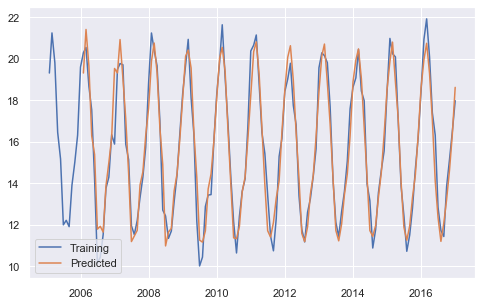

In [239]:
plt.figure(figsize=(8,5))
plt.plot(ts_train.temperature,label="Training")
plt.plot(ts_train.predict_temperature,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [247]:
ts_train['res_temp'] = results_sarima3.resid[12:]
ts_train.res_temp.mean()

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.012792516474364059

In [244]:
sts.adfuller(ts_train.res_temp[12:])

(-11.22853261796476,
 1.9332657633200082e-20,
 0,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 284.4993568110539)

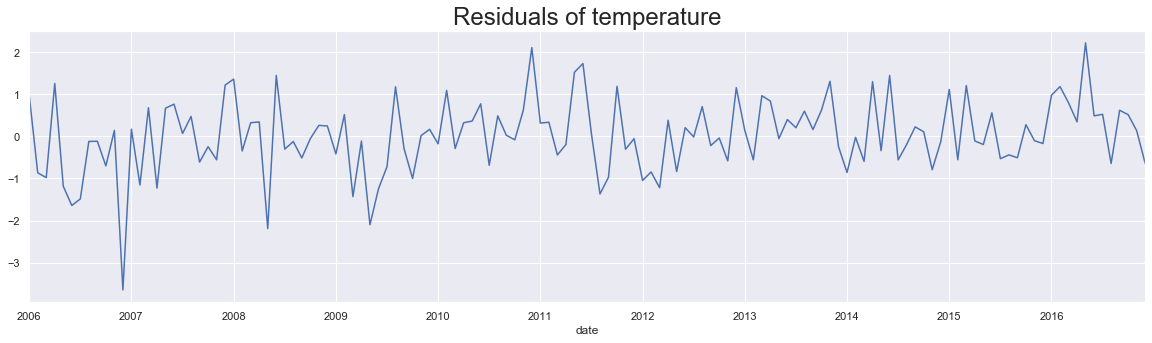

In [245]:
ts_train.res_temp[12:].plot(figsize=(20,5))
plt.title("Residuals of temperature",size=24)
plt.show()

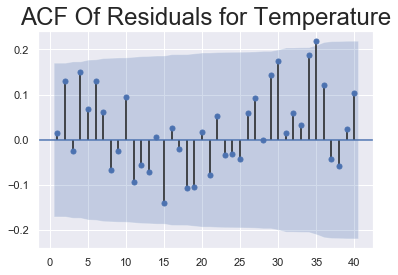

In [246]:
sgt.plot_acf(ts_train.res_temp[12:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Temperature",size=24)
plt.show()

======================================================================================================================= <br>
## <font color='red'>cek JB, smaa box" untuk error. dari analisis error, semua termasuk white noise</font>
======================================================================================================================= <br>

## <font color='blue'>Predicting Test Data</font>

In [213]:
ts_test['predicted_temperature'] = results_sarima3.forecast(len(ts_test))
ts_test

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,temperature,predicted_temperature
date,,
2017-01-31,19.261290,19.951214
2017-02-28,20.510714,20.680374
2017-03-31,19.745161,19.162648
2017-04-30,17.673333,16.952247
2017-05-31,13.793548,14.226906
2017-06-30,12.133333,12.031709
2017-07-31,11.216129,11.157527
2017-08-31,12.716129,11.933591
2017-09-30,13.823333,13.362219


### Plotting Train, Test, and Forecast Dataset

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


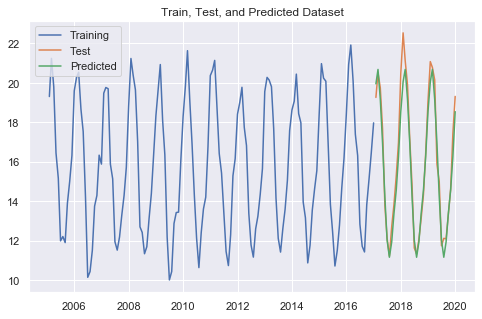

In [214]:
plt.figure(figsize=(8,5))
plt.plot(ts_train,label="Training")
plt.plot(ts_test.temperature,label="Test")
plt.plot(ts_test.predicted_temperature,label="Predicted")
plt.title("Train, Test, and Predicted Dataset")
plt.legend(loc = 'Left corner')
plt.show()

In [219]:
print("The R\N{SUPERSCRIPT TWO} score for the test data set:",r2_score(ts_test['predicted_temperature'], ts_test['temperature']))

The R² score for the test data set: 0.9405545080027847


======================================================================================================================= <br>
## <font color='red'> CONCLUSION </font>
======================================================================================================================= <br>

## <font color='blue'>Forecasting 2020 - 2021</font>

In [253]:
Forecast = results_sarima3.forecast(len(ts_test)+24)
Forecast = Forecast[len(ts_test):]
Forecast

2020-01-31    20.055069
2020-02-29    20.680374
2020-03-31    19.162648
2020-04-30    16.952247
2020-05-31    14.226906
2020-06-30    12.031709
2020-07-31    11.157527
2020-08-31    11.933591
2020-09-30    13.362219
2020-10-31    14.563189
2020-11-30    16.260002
2020-12-31    18.539800
2021-01-31    20.055069
2021-02-28    20.680374
2021-03-31    19.162648
2021-04-30    16.952247
2021-05-31    14.226906
2021-06-30    12.031709
2021-07-31    11.157527
2021-08-31    11.933591
2021-09-30    13.362219
2021-10-31    14.563189
2021-11-30    16.260002
2021-12-31    18.539800
Freq: M, dtype: float64

C:\Users\felic\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


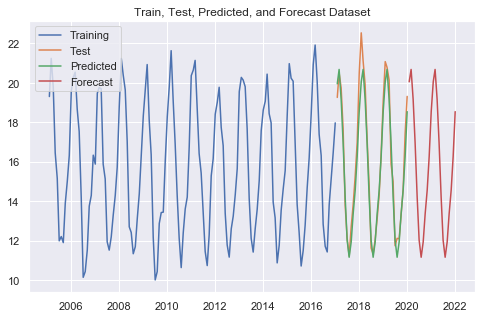

In [255]:
plt.figure(figsize=(8,5))
plt.plot(ts_train.temperature,label="Training")
plt.plot(ts_test.temperature,label="Test")
plt.plot(ts_test.predicted_temperature,label="Predicted")
plt.plot(Forecast,label="Forecast")
plt.title("Train, Test, Predicted, and Forecast Dataset")
plt.legend(loc = 'Left corner')
plt.show()

### Differencing Method

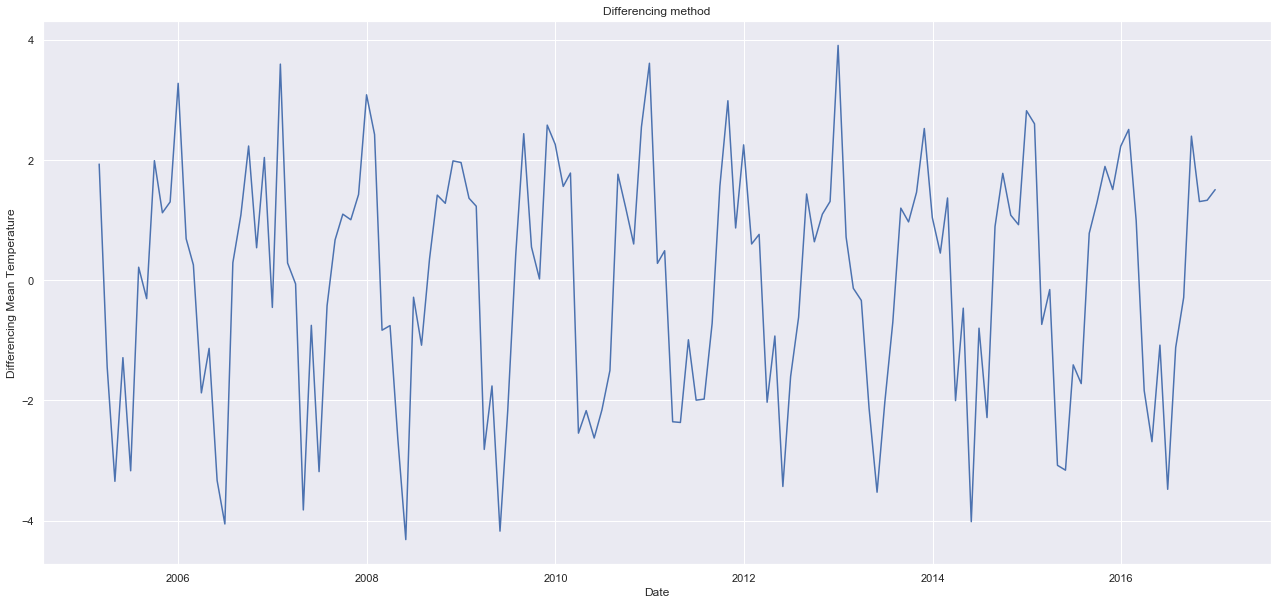

In [187]:
# differencing method
ts_train_diff = ts_train - ts_train.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_train_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [188]:
ts_train_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: adfuller test
check_adfuller(ts_train_diff.temperature)

Test statistic:  -4.326889330575984
p-value:  0.0003989218320373751
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


In [ ]:
Test statistic:  -4.326889330575984
p-value:  0.0003989218320373751
Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}

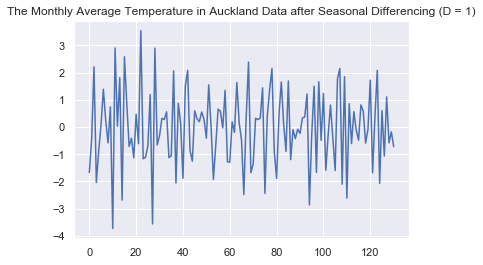

In [179]:
resample = ts_train_diff.resample("M")
monthly_mean = resample.mean()
ts_train_sdiff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    ts_train_sdiff.append(value)
pyplot.title("The Monthly Average Temperature in Auckland Data after Seasonal Differencing (D = 1)")
pyplot.plot(ts_train_sdiff)
pyplot.show()

In [183]:
pd.DataFrame(ts_train_sdiff).dropna(inplace=True) # due to shifting there is nan values
# check stationary: adfuller test
check_adfuller(ts_train_sdiff)

Test statistic:  -3.4668459136059133
p-value:  0.008880522024852806
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


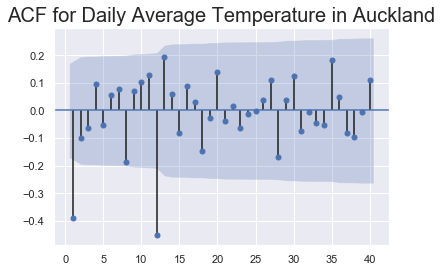

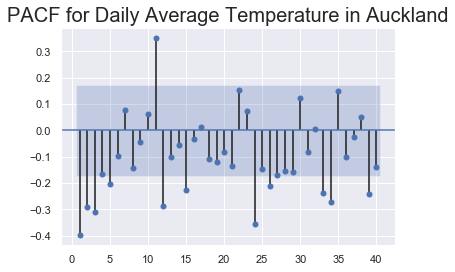

In [184]:
sgt.plot_acf(ts_train_sdiff, zero = False, lags = 40)
plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

sgt.plot_pacf(ts_train_sdiff[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

plt.show()

In [185]:
model_sarima6 = SARIMAX(ts_train.temperature, order=(0,1,1), seasonal_order = (0,1,1,12))
results_sarima6 = model_sarima6.fit()
results_sarima6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -169.040
Date:                            Sun, 04 Jul 2021   AIC                            344.079
Time:                                    22:15:52   BIC                            352.705
Sample:                                01-31-2005   HQIC                           347.584
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8516      0.053    -16.205      0.000      -0.955      -0.749
ma.S.L12      -0.9979      9.953     -0.100      0.920     -20.505      18.509
sigma2         0.6100      6.049      0.101      0.920     -11.245      12.465
===================================================================================
Ljung-Box (Q):                       57.28   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.04   Prob(JB):                         0.77
Heteroskedasticity (H):               0.63   Skew:                            -0.15
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
model_sarima6 = SARIMAX(ts_train.temperature, order=(1,1,0), seasonal_order = (2,1,0,12))
results_sarima6 = model_sarima6.fit()
results_sarima6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -190.575
Date:                            Sun, 04 Jul 2021   AIC                            389.151
Time:                                    22:16:31   BIC                            400.652
Sample:                                01-31-2005   HQIC                           393.824
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4402      0.087     -5.040      0.000      -0.611      -0.269
ar.S.L12      -0.6994      0.096     -7.293      0.000      -0.887      -0.511
ar.S.L24      -0.3985      0.094     -4.259      0.000      -0.582      -0.215
sigma2         1.0120      0.122      8.284      0.000       0.773       1.251
===================================================================================
Ljung-Box (Q):                       70.76   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.00   Prob(JB):                         0.75
Heteroskedasticity (H):               0.72   Skew:                             0.11
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
sarima_pred = results_sarima3.get_prediction(2017, 2021)


NameError: name 'sarima_fit' is not defined